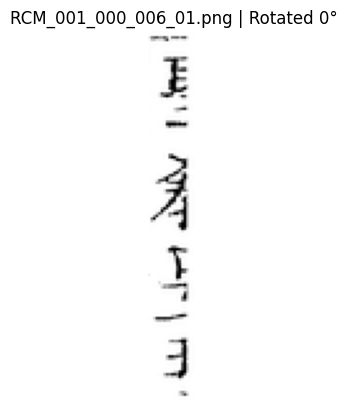

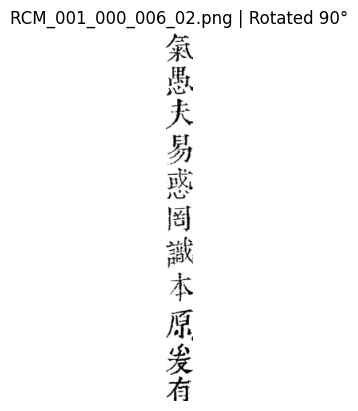

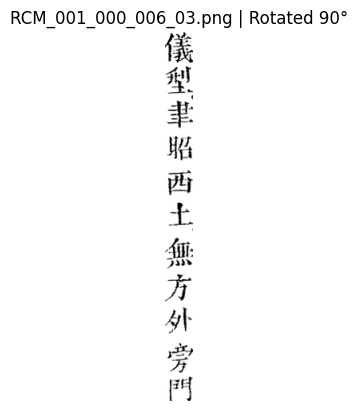

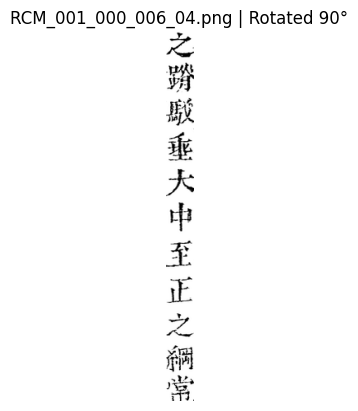

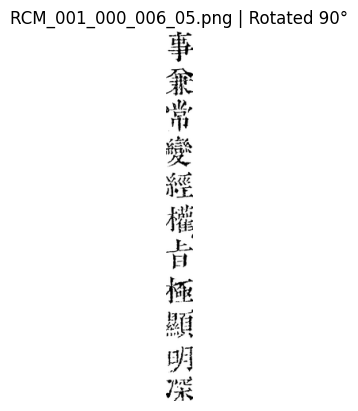

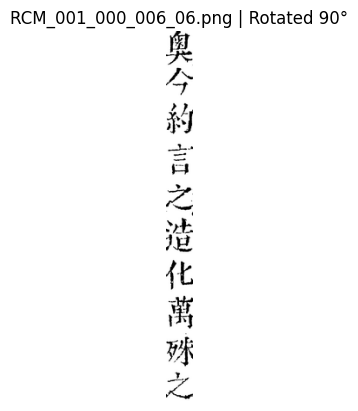

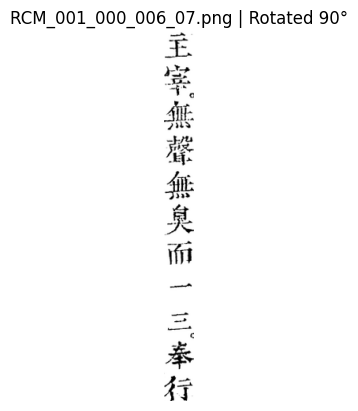

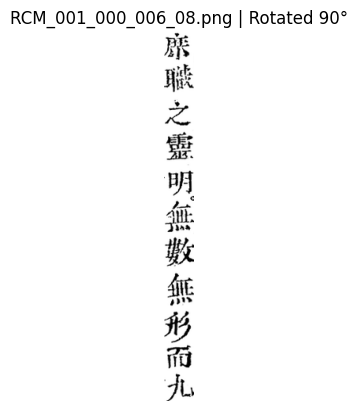

In [ ]:
import os
import numpy as np
import ast
import pandas as pd
import re
import matplotlib.pyplot as plt
from PIL import Image



# Load data
df = pd.read_excel(r"D:\learning\lab NLP\week02\2505\tool_fix\data\upload\samples.xlsx")
path_dir = r"D:\learning\lab NLP\week02\2505\tool_fix\image/"

lst = os.listdir(path_dir)
for path in lst:
    input_path = os.path.join(path_dir, path)

    # Lấy bbox từ file Excel
    bbox_str = df[df["Img_Box_ID"] == path]["Img_Box_Coordinate"].values
    if len(bbox_str) == 0:
        print(f"❌ Không tìm thấy bbox cho: {path}")
        continue

    match = re.search(r"\[\[.*?\]\]", bbox_str[0])
    if match:
        try:
            bbox_array = np.array(ast.literal_eval(match.group()), np.float32)
            img_rotated, angle = rotate_to_vertical(input_path, bbox_array)

            # Hiển thị ảnh dùng matplotlib với PIL
            plt.imshow(img_rotated)
            plt.title(f"{path} | Rotated {angle}°")
            plt.axis("off")
            plt.show()

        except Exception as e:
            print(f"❌ Lỗi xử lý ảnh {path}: {e}")
    else:
        print(f"❌ Không tìm thấy bbox hợp lệ cho: {path}")
